In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot 
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 


In [2]:
### GPU 사용 확인 ###

print(f'GPU 사용가능 여부: {torch.cuda.is_available()}')
print(f'GPU 사용가능 개수 : {torch.cuda.device_count()}')
print(f'GPU 정보 반환 :  {torch.cuda.get_device_name(0)}')

### GPU 디바이스 할당 ###
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

GPU 사용가능 여부: True
GPU 사용가능 개수 : 2
GPU 정보 반환 :  NVIDIA GeForce RTX 2080 Ti
cuda:0


In [3]:
# 분류 클래스 명칭 리스트
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 분류 클래스 수,　10
n_output = len(list(set(classes)))

# 결과 확인
print(n_output)

10


In [4]:
# drop out  실험용 더미 
torch.manual_seed(123)
inputs = torch.randn(1, 10)
print(inputs)
print('-'*100)

# drop out 함수 동작 테스트 
dropout = nn.Dropout(0.5)
dropout.train()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)

dropout.eval()
print(dropout.training)
outputs = dropout(inputs)
print(outputs)

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085]])
----------------------------------------------------------------------------------------------------
True
tensor([[-0.0000,  0.2407, -0.0000, -0.4808, -0.0000,  0.0000, -1.9447, -0.0000,
          0.6478, -0.2170]])
False
tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
          0.3239, -0.1085]])


In [5]:
# 공통 함수 다운로드
!git clone https://github.com/wikibook/pythonlibs.git

# 공통 함수 불러오기
from pythonlibs.torch_lib1 import *

# 공통 함수 확인
print(README)

Common Library for PyTorch
Author: M. Akaishi


fatal: destination path 'pythonlibs' already exists and is not an empty directory.


In [6]:
# transform 정의 
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

# 데이터 취득용 함수 Dataset
data_root = './data'

train_set = datasets.CIFAR10(
    root = data_root, train=True,
    download=True, transform=transform
)

test_set = datasets.CIFAR10(
    root = data_root, train=False,
    download=True, transform=transform
)


# 데이터 확인 
print(train_set)
print(test_set)

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


In [7]:
# 미니 배치 사이즈 지정
batch_size = 100

# 훈련용 데이터로더
# 훈련용이므로 셔플을 True로 설정
train_loader = DataLoader(train_set, 
    batch_size = batch_size, shuffle = True)

# 검증용 데이터로더
# 검증용이므로 셔플하지 않음
test_loader = DataLoader(test_set,  
    batch_size = batch_size, shuffle = False) 

클래스 정의

In [8]:
class CNN_v2(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            )
        
        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2
        )

    def forward(self,x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3
     

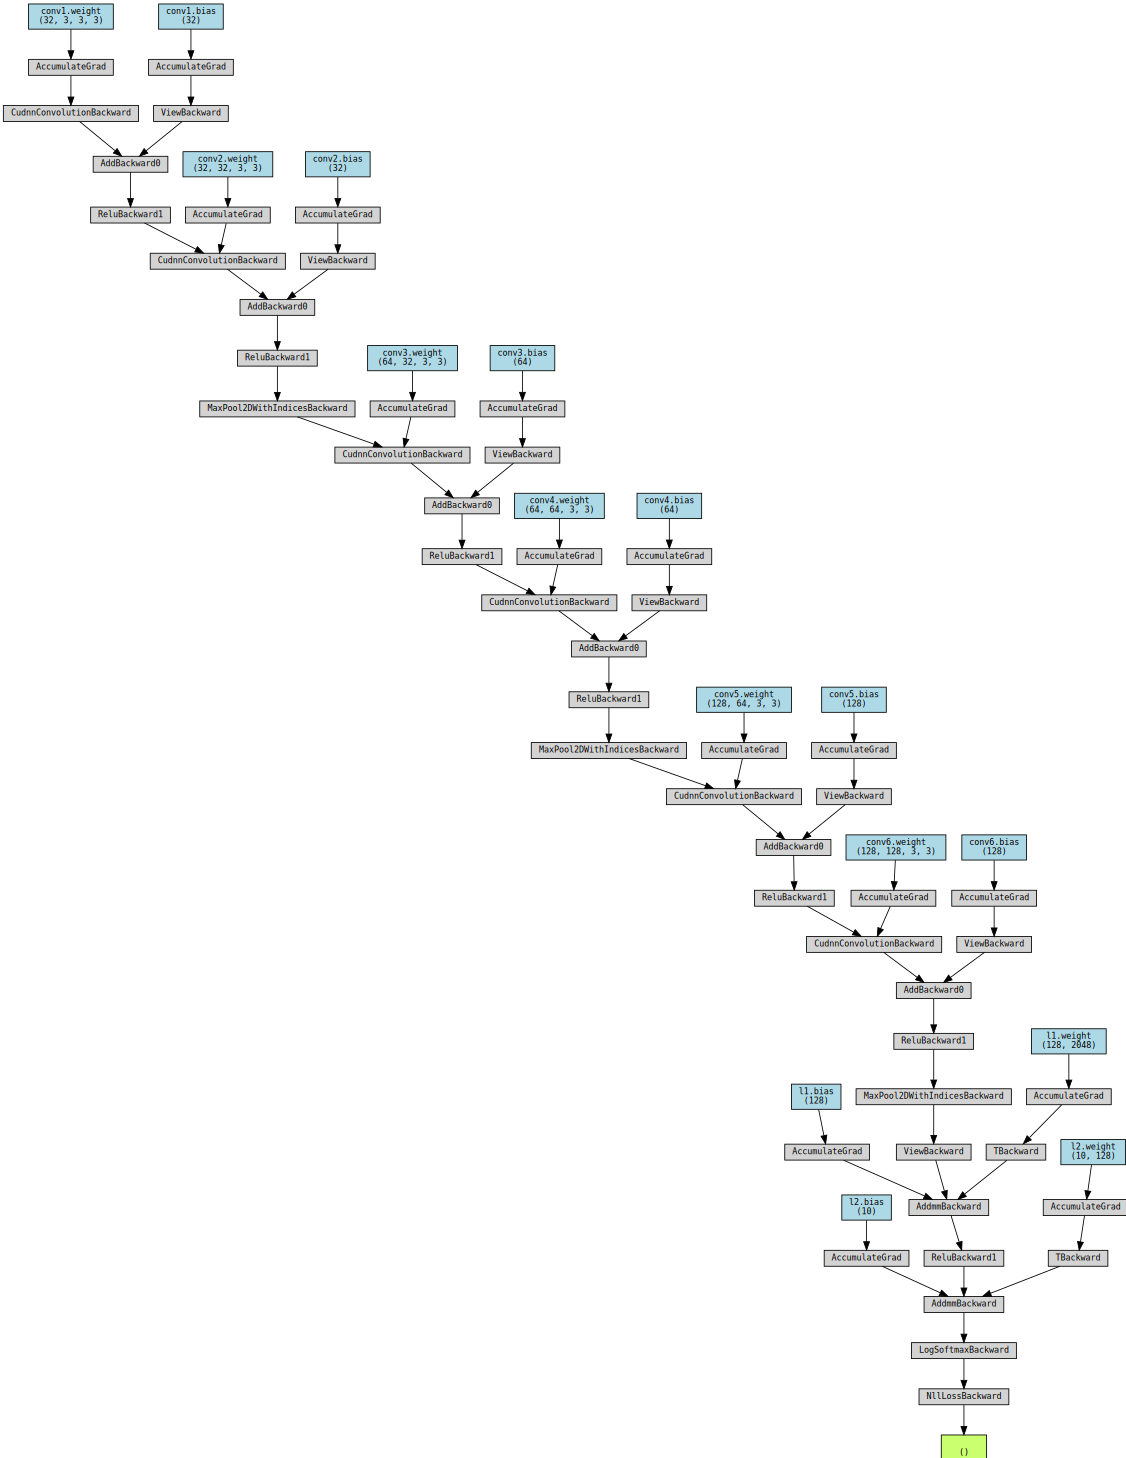

In [9]:
# 손실 계산 그래프 시각화
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
loss = eval_loss(test_loader, device, net, criterion)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [17]:
torch_seed=() # 난수 고정

lr = 0.01
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
history = np.zeros((0, 5))

In [12]:
num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 0.02303 acc: 0.10000 val_loss: 0.02303, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 0.02303 acc: 0.10006 val_loss: 0.02302, val_acc: 0.10300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.02302 acc: 0.10602 val_loss: 0.02302, val_acc: 0.11720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.02302 acc: 0.12218 val_loss: 0.02301, val_acc: 0.12300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.02301 acc: 0.14776 val_loss: 0.02299, val_acc: 0.14230


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.02287 acc: 0.14956 val_loss: 0.02245, val_acc: 0.14240


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.02145 acc: 0.22274 val_loss: 0.02027, val_acc: 0.26370


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.01977 acc: 0.27752 val_loss: 0.01921, val_acc: 0.28180


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.01893 acc: 0.30804 val_loss: 0.01839, val_acc: 0.34290


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.01812 acc: 0.34132 val_loss: 0.01795, val_acc: 0.34270


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.01738 acc: 0.36582 val_loss: 0.01677, val_acc: 0.38670


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.01672 acc: 0.38876 val_loss: 0.01628, val_acc: 0.40710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.01613 acc: 0.41280 val_loss: 0.01615, val_acc: 0.41330


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.01550 acc: 0.43640 val_loss: 0.01642, val_acc: 0.41700


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.01498 acc: 0.45782 val_loss: 0.01489, val_acc: 0.45690


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.01449 acc: 0.47944 val_loss: 0.01439, val_acc: 0.47610


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.01408 acc: 0.49236 val_loss: 0.01383, val_acc: 0.49720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.01366 acc: 0.50716 val_loss: 0.01344, val_acc: 0.51870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.01326 acc: 0.52468 val_loss: 0.01320, val_acc: 0.52050


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.01287 acc: 0.53694 val_loss: 0.01296, val_acc: 0.52800


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.01249 acc: 0.55516 val_loss: 0.01255, val_acc: 0.54560


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.01210 acc: 0.56874 val_loss: 0.01251, val_acc: 0.55590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.01170 acc: 0.58556 val_loss: 0.01211, val_acc: 0.56380


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.01137 acc: 0.59602 val_loss: 0.01170, val_acc: 0.57730


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.01098 acc: 0.61102 val_loss: 0.01158, val_acc: 0.58270


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.01059 acc: 0.62906 val_loss: 0.01152, val_acc: 0.58870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.01025 acc: 0.64116 val_loss: 0.01146, val_acc: 0.58880


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.00988 acc: 0.65426 val_loss: 0.01144, val_acc: 0.59580


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.00950 acc: 0.66660 val_loss: 0.01088, val_acc: 0.61480


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.00914 acc: 0.68134 val_loss: 0.01066, val_acc: 0.62800


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.00875 acc: 0.69490 val_loss: 0.01045, val_acc: 0.63540


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.00840 acc: 0.70726 val_loss: 0.01046, val_acc: 0.63440


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.00805 acc: 0.71938 val_loss: 0.01014, val_acc: 0.65410


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.00768 acc: 0.73166 val_loss: 0.01018, val_acc: 0.65050


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.00729 acc: 0.74440 val_loss: 0.01057, val_acc: 0.65070


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.00693 acc: 0.75844 val_loss: 0.01062, val_acc: 0.65100


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.00657 acc: 0.76982 val_loss: 0.01050, val_acc: 0.65460


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.00622 acc: 0.78346 val_loss: 0.01039, val_acc: 0.66260


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.00578 acc: 0.79806 val_loss: 0.01133, val_acc: 0.64670


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.00543 acc: 0.81066 val_loss: 0.01150, val_acc: 0.64540


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.00506 acc: 0.82192 val_loss: 0.01125, val_acc: 0.65920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.00468 acc: 0.83572 val_loss: 0.01161, val_acc: 0.65130


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.00434 acc: 0.84604 val_loss: 0.01221, val_acc: 0.65140


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.00400 acc: 0.85834 val_loss: 0.01305, val_acc: 0.64510


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.00367 acc: 0.86916 val_loss: 0.01216, val_acc: 0.65970


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.00328 acc: 0.88292 val_loss: 0.01317, val_acc: 0.66140


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.00300 acc: 0.89420 val_loss: 0.01437, val_acc: 0.65830


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.00266 acc: 0.90524 val_loss: 0.01460, val_acc: 0.64890


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.00234 acc: 0.91856 val_loss: 0.01834, val_acc: 0.61100


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.00218 acc: 0.92310 val_loss: 0.01596, val_acc: 0.65190


초기상태 : 손실 : 0.02303  정확도 : 0.10000
최종상태 : 손실 : 0.01596 정확도 : 0.65190


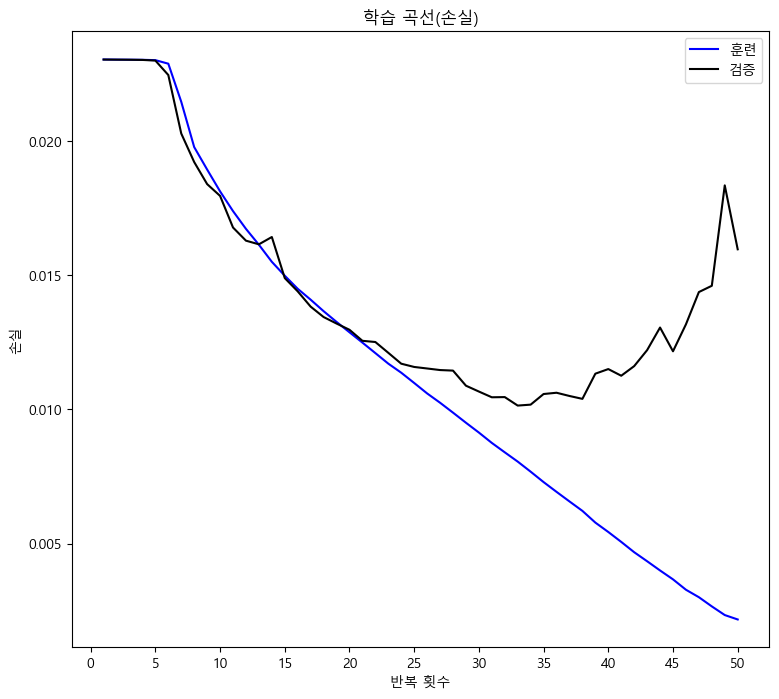

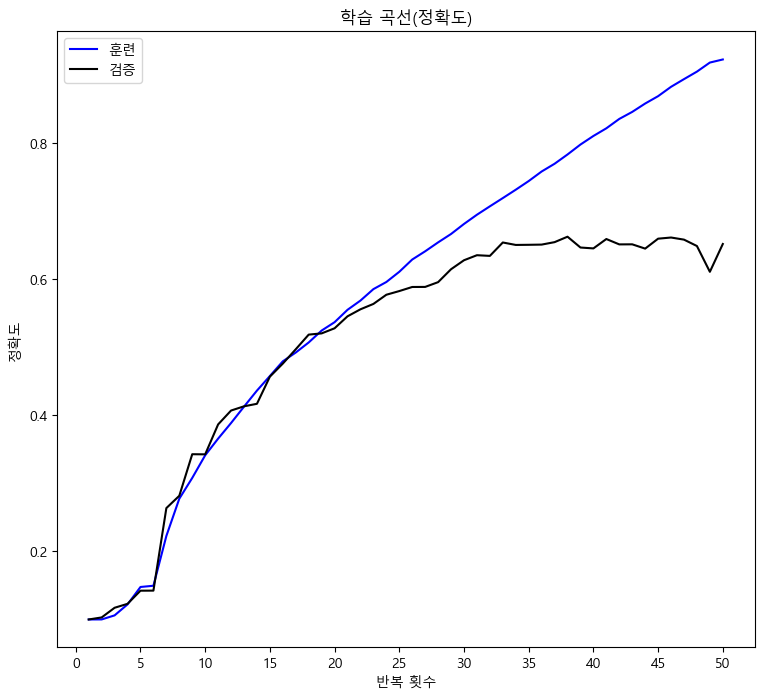

In [14]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

evaluate_history(history)

모멘텀 설정 

In [35]:
# 난수 고정
torch_seed=()

# 모델 인스턴스 생성
lr = 0.01
net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
history2 = np.zeros((0, 5))

In [36]:
num_epochs=20
history2 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history2)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/20], loss: 0.02303 acc: 0.09966 val_loss: 0.02303, val_acc: 0.10000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/20], loss: 0.02303 acc: 0.10082 val_loss: 0.02302, val_acc: 0.09920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/20], loss: 0.02302 acc: 0.10430 val_loss: 0.02302, val_acc: 0.11200


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/20], loss: 0.02302 acc: 0.12474 val_loss: 0.02302, val_acc: 0.13800


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/20], loss: 0.02301 acc: 0.13358 val_loss: 0.02300, val_acc: 0.14550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/20], loss: 0.02297 acc: 0.17158 val_loss: 0.02288, val_acc: 0.15840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/20], loss: 0.02210 acc: 0.18918 val_loss: 0.02059, val_acc: 0.25190


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/20], loss: 0.01971 acc: 0.27768 val_loss: 0.01880, val_acc: 0.31370


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/20], loss: 0.01837 acc: 0.33362 val_loss: 0.01747, val_acc: 0.35850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/20], loss: 0.01728 acc: 0.37326 val_loss: 0.01631, val_acc: 0.40200


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/20], loss: 0.01640 acc: 0.40166 val_loss: 0.01589, val_acc: 0.42220


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/20], loss: 0.01561 acc: 0.43052 val_loss: 0.01514, val_acc: 0.44630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/20], loss: 0.01509 acc: 0.45156 val_loss: 0.01470, val_acc: 0.46660


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/20], loss: 0.01459 acc: 0.47190 val_loss: 0.01430, val_acc: 0.48020


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/20], loss: 0.01414 acc: 0.49226 val_loss: 0.01375, val_acc: 0.50380


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/20], loss: 0.01363 acc: 0.50876 val_loss: 0.01437, val_acc: 0.48780


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/20], loss: 0.01316 acc: 0.52980 val_loss: 0.01286, val_acc: 0.53720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/20], loss: 0.01271 acc: 0.54664 val_loss: 0.01263, val_acc: 0.54310


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/20], loss: 0.01222 acc: 0.56622 val_loss: 0.01209, val_acc: 0.56710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.01173 acc: 0.58394 val_loss: 0.01177, val_acc: 0.57990


초기상태 : 손실 : 0.02303  정확도 : 0.10000
최종상태 : 손실 : 0.01177 정확도 : 0.57990


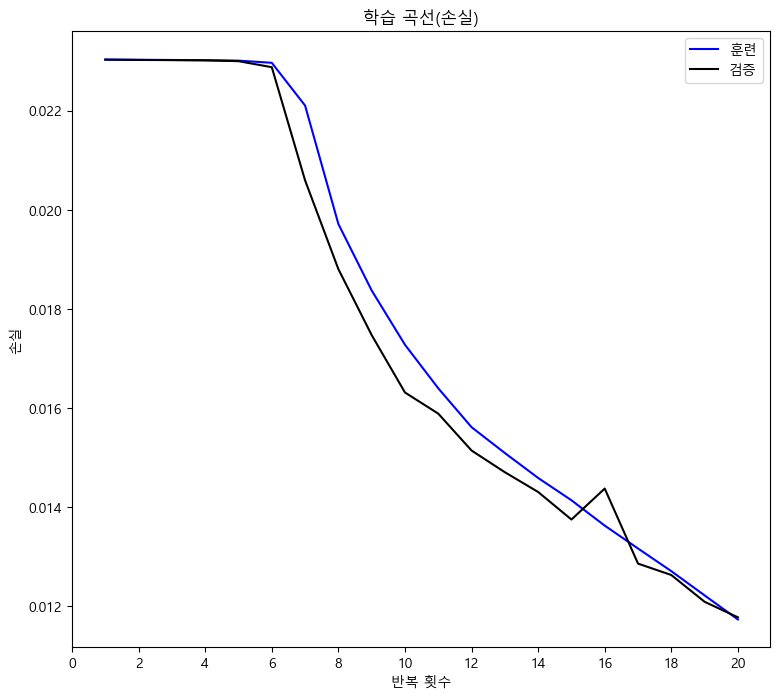

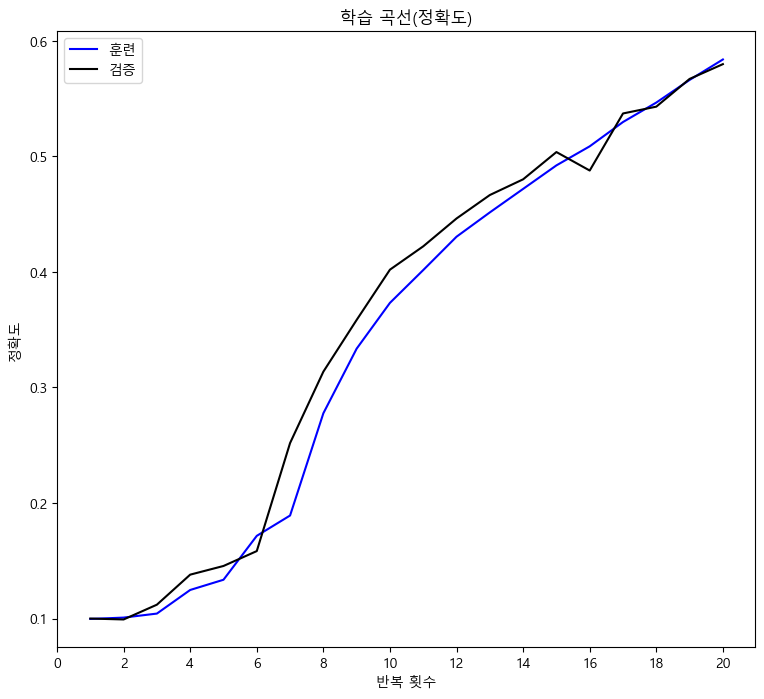

In [37]:
evaluate_history(history2)

In [41]:
torch_seed=()

net = CNN_v2(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history3 = np.zeros((0,5))

In [42]:
num_epochs=20
history3 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history3)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/20], loss: 0.01562 acc: 0.42570 val_loss: 0.01239, val_acc: 0.54710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/20], loss: 0.01081 acc: 0.61482 val_loss: 0.00976, val_acc: 0.65880


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/20], loss: 0.00858 acc: 0.69572 val_loss: 0.00824, val_acc: 0.71180


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/20], loss: 0.00707 acc: 0.75104 val_loss: 0.00747, val_acc: 0.74600


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/20], loss: 0.00591 acc: 0.79414 val_loss: 0.00703, val_acc: 0.76180


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/20], loss: 0.00506 acc: 0.82244 val_loss: 0.00690, val_acc: 0.76960


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/20], loss: 0.00423 acc: 0.85160 val_loss: 0.00698, val_acc: 0.77220


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/20], loss: 0.00348 acc: 0.87816 val_loss: 0.00720, val_acc: 0.77720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/20], loss: 0.00294 acc: 0.89726 val_loss: 0.00770, val_acc: 0.77380


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/20], loss: 0.00239 acc: 0.91484 val_loss: 0.00868, val_acc: 0.77450


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/20], loss: 0.00198 acc: 0.92866 val_loss: 0.00859, val_acc: 0.77520


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/20], loss: 0.00167 acc: 0.94046 val_loss: 0.01022, val_acc: 0.76580


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/20], loss: 0.00138 acc: 0.95044 val_loss: 0.00984, val_acc: 0.77350


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/20], loss: 0.00119 acc: 0.95840 val_loss: 0.01098, val_acc: 0.76300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/20], loss: 0.00111 acc: 0.95970 val_loss: 0.01128, val_acc: 0.77270


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/20], loss: 0.00106 acc: 0.96328 val_loss: 0.01274, val_acc: 0.76000


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/20], loss: 0.00097 acc: 0.96580 val_loss: 0.01261, val_acc: 0.76910


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/20], loss: 0.00095 acc: 0.96694 val_loss: 0.01269, val_acc: 0.77480


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/20], loss: 0.00081 acc: 0.97128 val_loss: 0.01357, val_acc: 0.76500


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.00083 acc: 0.97142 val_loss: 0.01364, val_acc: 0.77540


초기상태 : 손실 : 0.01239  정확도 : 0.54710
최종상태 : 손실 : 0.01364 정확도 : 0.77540


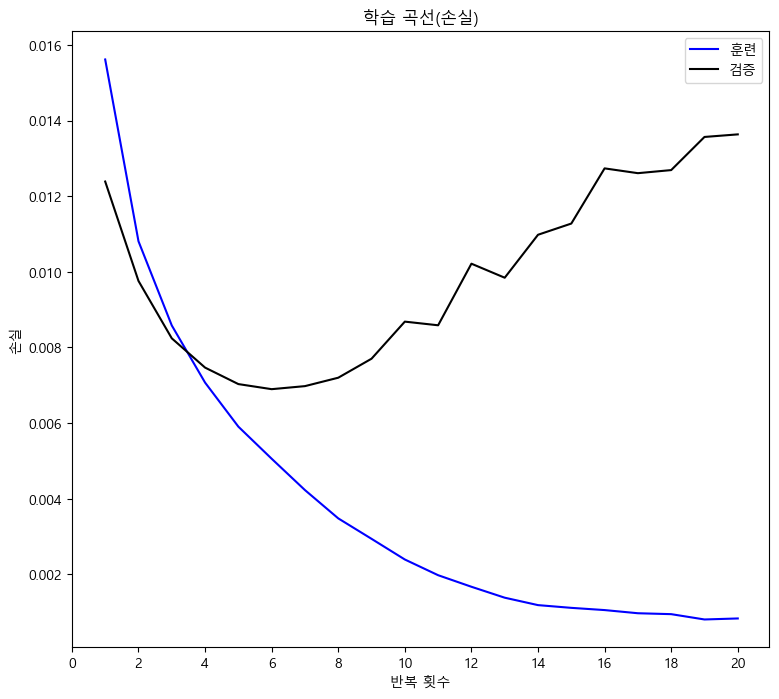

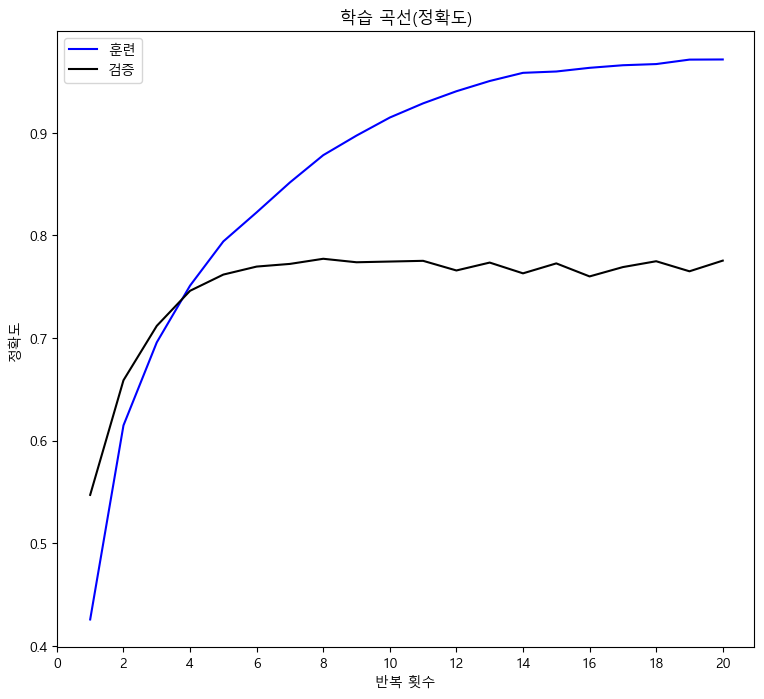

In [43]:
evaluate_history(history3)

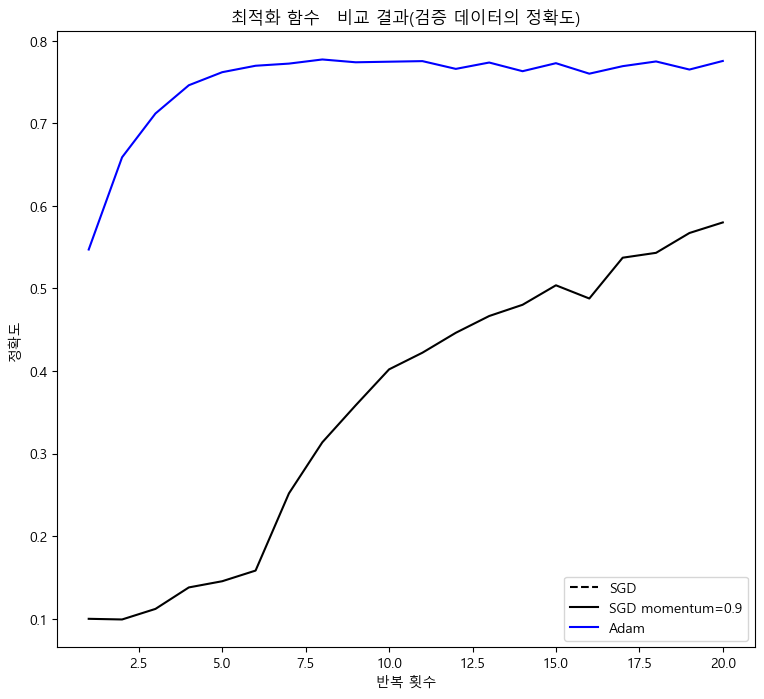

In [44]:
plt.figure(figsize=(9,8))
plt.plot(history[:,0], history[:,4], label='SGD', c='k',ls='dashed' )
plt.plot(history2[:,0], history2[:,4], label='SGD momentum=0.9', c='k')
plt.plot(history3[:,0], history3[:,4], label='Adam', c='b')
plt.title('최적화 함수　비교 결과(검증 데이터의 정확도)')
plt.xlabel('반복 횟수')
plt.ylabel('정확도')
plt.legend()
plt.show()

dropout 추가 

In [47]:
class CNN_v3(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            self.dropout3,
            )
        
        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self,x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3
     

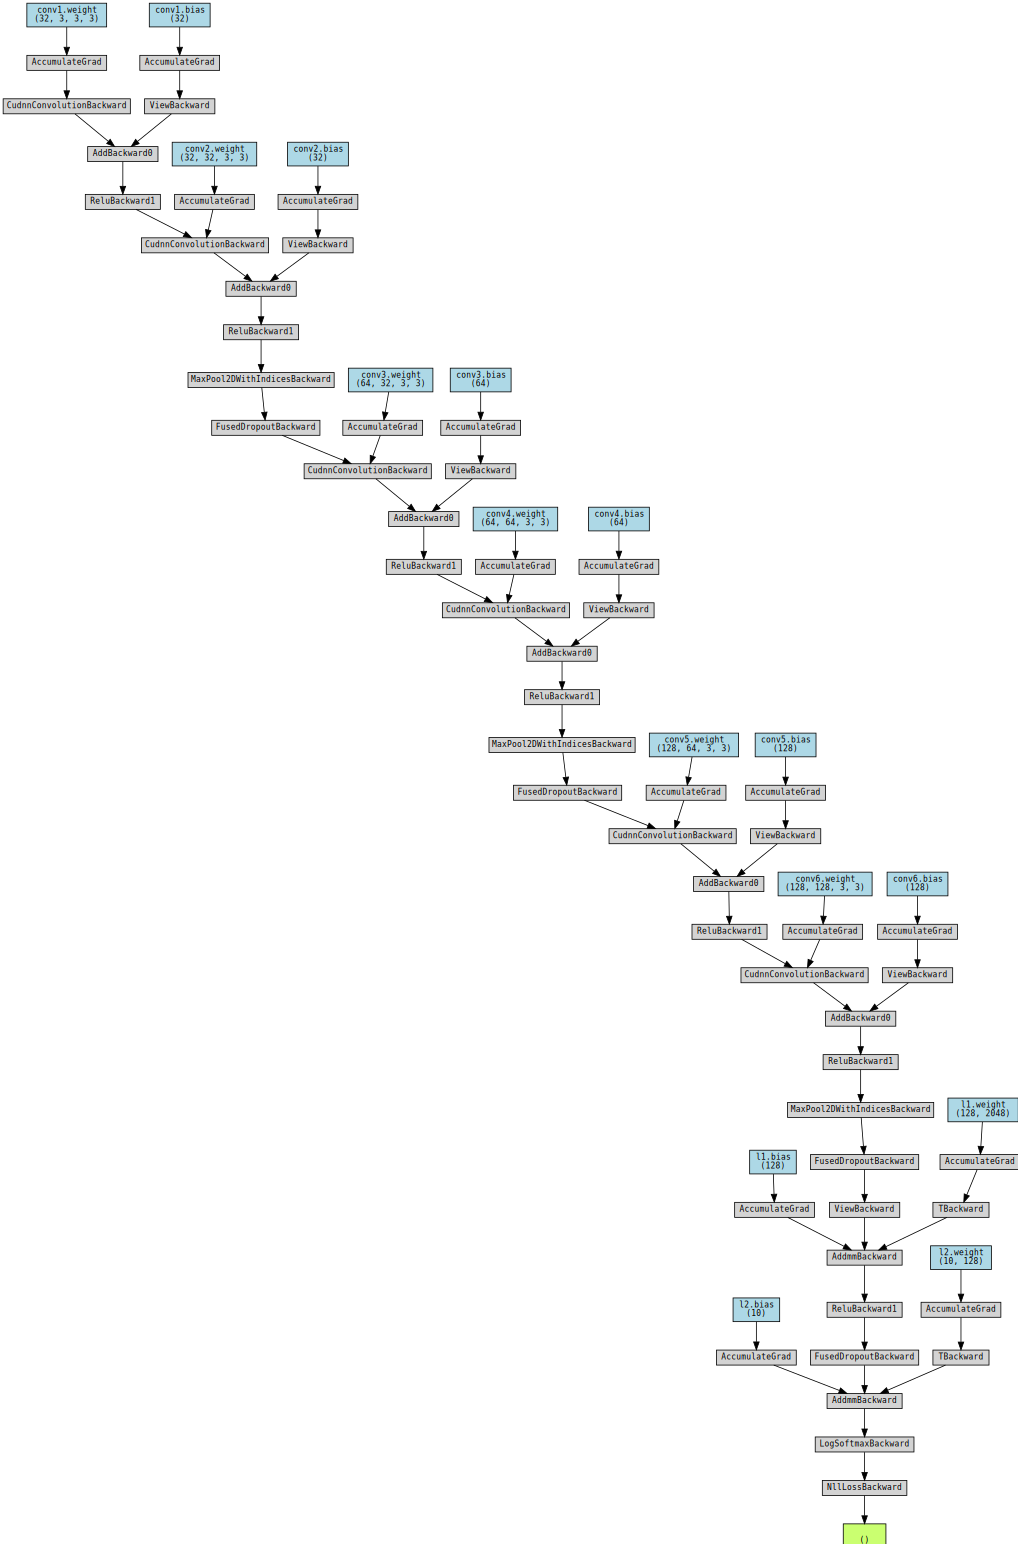

In [51]:
# 손실 계산 그래프 시각화
net = CNN_v3(n_output).to(device)
criterion = nn.CrossEntropyLoss()
loss = eval_loss(test_loader, device, net, criterion)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [57]:
torch_seed=()

net = CNN_v3(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history = np.zeros((0,5))



In [59]:
num_epochs = 50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 0.01706 acc: 0.36490 val_loss: 0.01321, val_acc: 0.51420


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 0.01269 acc: 0.54286 val_loss: 0.01052, val_acc: 0.62760


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.01078 acc: 0.61858 val_loss: 0.00977, val_acc: 0.65210


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.00955 acc: 0.66510 val_loss: 0.00829, val_acc: 0.70790


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.00871 acc: 0.69500 val_loss: 0.00753, val_acc: 0.73880


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.00804 acc: 0.72196 val_loss: 0.00729, val_acc: 0.74760


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.00755 acc: 0.74030 val_loss: 0.00664, val_acc: 0.77650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.00713 acc: 0.75166 val_loss: 0.00641, val_acc: 0.77810


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.00683 acc: 0.76448 val_loss: 0.00649, val_acc: 0.78040


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.00652 acc: 0.77432 val_loss: 0.00619, val_acc: 0.79110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.00620 acc: 0.78576 val_loss: 0.00609, val_acc: 0.79030


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.00599 acc: 0.79280 val_loss: 0.00612, val_acc: 0.79400


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.00585 acc: 0.79686 val_loss: 0.00595, val_acc: 0.79990


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.00564 acc: 0.80476 val_loss: 0.00588, val_acc: 0.80460


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.00552 acc: 0.81136 val_loss: 0.00577, val_acc: 0.80660


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.00537 acc: 0.81434 val_loss: 0.00559, val_acc: 0.81590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.00525 acc: 0.81674 val_loss: 0.00550, val_acc: 0.81340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.00514 acc: 0.82266 val_loss: 0.00561, val_acc: 0.81480


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.00501 acc: 0.82714 val_loss: 0.00573, val_acc: 0.81710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.00497 acc: 0.82808 val_loss: 0.00556, val_acc: 0.81890


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.00487 acc: 0.83066 val_loss: 0.00545, val_acc: 0.81840


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.00479 acc: 0.83374 val_loss: 0.00564, val_acc: 0.82260


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.00478 acc: 0.83606 val_loss: 0.00532, val_acc: 0.82240


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.00463 acc: 0.84098 val_loss: 0.00549, val_acc: 0.82610


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.00459 acc: 0.83972 val_loss: 0.00551, val_acc: 0.82580


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.00451 acc: 0.84264 val_loss: 0.00528, val_acc: 0.82570


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.00448 acc: 0.84552 val_loss: 0.00545, val_acc: 0.82550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.00433 acc: 0.85008 val_loss: 0.00532, val_acc: 0.83170


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.00439 acc: 0.84906 val_loss: 0.00542, val_acc: 0.82380


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.00428 acc: 0.84990 val_loss: 0.00531, val_acc: 0.82690


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.00425 acc: 0.85296 val_loss: 0.00512, val_acc: 0.83590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.00417 acc: 0.85394 val_loss: 0.00541, val_acc: 0.82710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.00418 acc: 0.85320 val_loss: 0.00521, val_acc: 0.83510


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.00408 acc: 0.85698 val_loss: 0.00538, val_acc: 0.83100


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.00412 acc: 0.85750 val_loss: 0.00551, val_acc: 0.82650


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.00403 acc: 0.85892 val_loss: 0.00514, val_acc: 0.83770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.00402 acc: 0.86216 val_loss: 0.00523, val_acc: 0.83350


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.00398 acc: 0.86228 val_loss: 0.00526, val_acc: 0.83540


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.00398 acc: 0.86174 val_loss: 0.00535, val_acc: 0.83320


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.00391 acc: 0.86386 val_loss: 0.00526, val_acc: 0.83670


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.00391 acc: 0.86336 val_loss: 0.00537, val_acc: 0.83170


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.00392 acc: 0.86250 val_loss: 0.00534, val_acc: 0.83690


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.00384 acc: 0.86578 val_loss: 0.00536, val_acc: 0.83680


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.00381 acc: 0.86830 val_loss: 0.00544, val_acc: 0.83390


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.00388 acc: 0.86568 val_loss: 0.00513, val_acc: 0.84110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.00380 acc: 0.86810 val_loss: 0.00514, val_acc: 0.83910


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.00377 acc: 0.86946 val_loss: 0.00531, val_acc: 0.84170


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.00372 acc: 0.87148 val_loss: 0.00554, val_acc: 0.83610


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.00372 acc: 0.86978 val_loss: 0.00538, val_acc: 0.83450


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.00369 acc: 0.87230 val_loss: 0.00526, val_acc: 0.83910


초기상태 : 손실 : 0.01321  정확도 : 0.51420
최종상태 : 손실 : 0.00526 정확도 : 0.83910


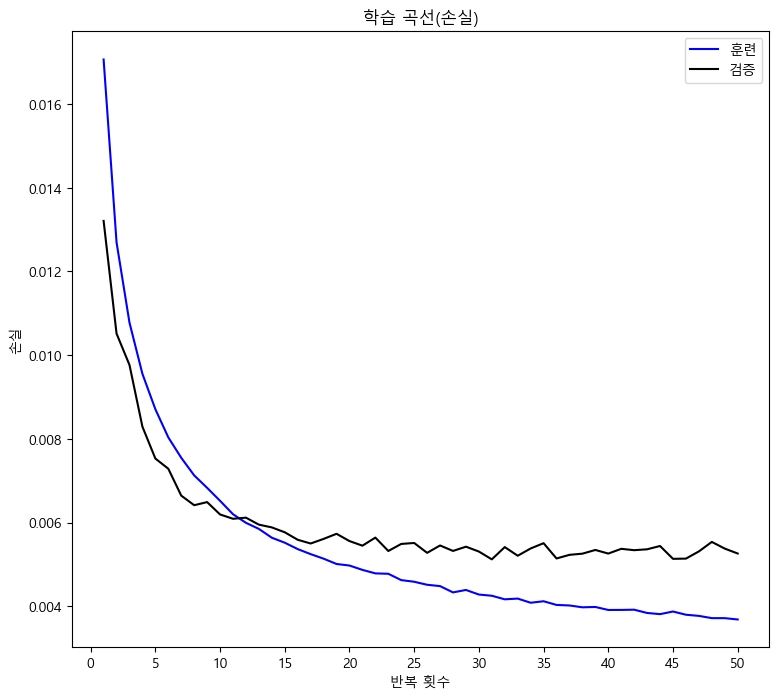

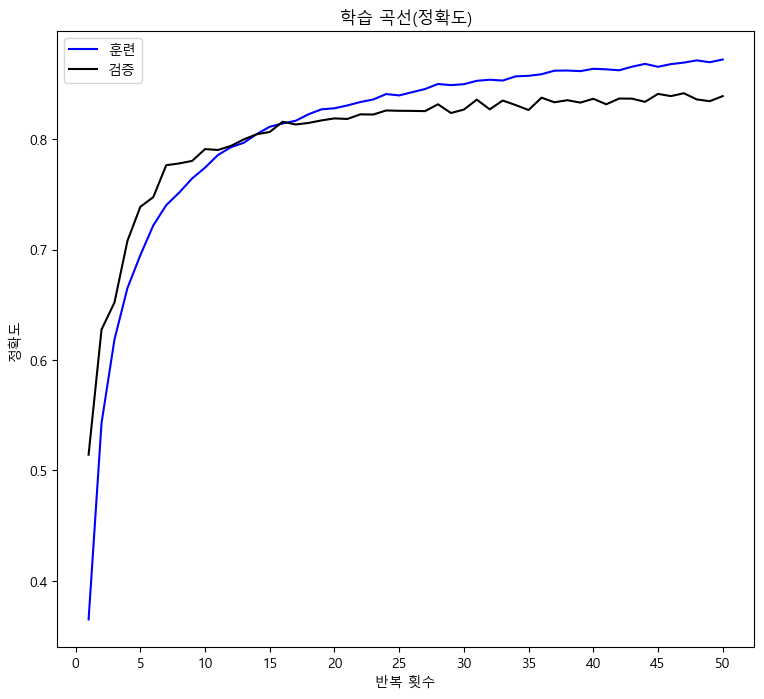

In [60]:
evaluate_history(history)

BatchNorm 추가 

In [62]:
class CNN_v4(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(64)
        self.bn5 = nn.BatchNorm2d(128)
        self.bn6 = nn.BatchNorm2d(128)


        self.features = nn.Sequential(
            self.conv1,
            self.bn1,
            self.relu,
            self.conv2,
            self.bn2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.bn3,
            self.relu,
            self.conv4,
            self.bn4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.bn5,
            self.relu,
            self.conv6,
            self.bn6,
            self.relu,
            self.maxpool,
            self.dropout3,
            )
        
        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self,x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3
     

In [63]:
torch_seed=()
net = CNN_v4(n_output).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
history  = np.zeros((0,5))

In [65]:
num_epochs=50
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/50], loss: 0.01451 acc: 0.46598 val_loss: 0.01099, val_acc: 0.59920


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2/50], loss: 0.01078 acc: 0.61770 val_loss: 0.00866, val_acc: 0.69340


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.00935 acc: 0.67438 val_loss: 0.00790, val_acc: 0.72200


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.00850 acc: 0.70422 val_loss: 0.00700, val_acc: 0.75460


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.00789 acc: 0.73060 val_loss: 0.00654, val_acc: 0.77250


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.00740 acc: 0.74746 val_loss: 0.00718, val_acc: 0.75480


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.00704 acc: 0.76094 val_loss: 0.00584, val_acc: 0.79080


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.00665 acc: 0.77646 val_loss: 0.00551, val_acc: 0.81010


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.00634 acc: 0.78358 val_loss: 0.00563, val_acc: 0.80850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.00608 acc: 0.79254 val_loss: 0.00626, val_acc: 0.78940


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.00581 acc: 0.80390 val_loss: 0.00538, val_acc: 0.81930


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.00559 acc: 0.81162 val_loss: 0.00509, val_acc: 0.82730


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.00536 acc: 0.82018 val_loss: 0.00504, val_acc: 0.83140


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.00520 acc: 0.82438 val_loss: 0.00524, val_acc: 0.82240


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.00500 acc: 0.83178 val_loss: 0.00508, val_acc: 0.83330


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.00487 acc: 0.83642 val_loss: 0.00468, val_acc: 0.84610


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.00466 acc: 0.84284 val_loss: 0.00490, val_acc: 0.83630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.00453 acc: 0.84714 val_loss: 0.00498, val_acc: 0.83730


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.00444 acc: 0.85094 val_loss: 0.00469, val_acc: 0.84480


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.00434 acc: 0.85320 val_loss: 0.00447, val_acc: 0.84980


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.00416 acc: 0.85934 val_loss: 0.00471, val_acc: 0.85090


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.00403 acc: 0.86464 val_loss: 0.00440, val_acc: 0.85760


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.00395 acc: 0.86768 val_loss: 0.00474, val_acc: 0.84680


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.00389 acc: 0.86946 val_loss: 0.00470, val_acc: 0.85100


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.00376 acc: 0.87476 val_loss: 0.00456, val_acc: 0.85710


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.00370 acc: 0.87486 val_loss: 0.00445, val_acc: 0.85850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.00366 acc: 0.87700 val_loss: 0.00447, val_acc: 0.86300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.00350 acc: 0.87986 val_loss: 0.00446, val_acc: 0.86100


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.00340 acc: 0.88568 val_loss: 0.00438, val_acc: 0.86050


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.00336 acc: 0.88544 val_loss: 0.00450, val_acc: 0.86030


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.00330 acc: 0.88794 val_loss: 0.00448, val_acc: 0.85700


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.00325 acc: 0.88972 val_loss: 0.00459, val_acc: 0.85780


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.00321 acc: 0.89258 val_loss: 0.00439, val_acc: 0.86590


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.00311 acc: 0.89478 val_loss: 0.00454, val_acc: 0.86620


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.00313 acc: 0.89270 val_loss: 0.00442, val_acc: 0.86770


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.00302 acc: 0.89840 val_loss: 0.00431, val_acc: 0.86730


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.00299 acc: 0.89688 val_loss: 0.00440, val_acc: 0.86410


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.00294 acc: 0.89998 val_loss: 0.00444, val_acc: 0.86950


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.00286 acc: 0.90070 val_loss: 0.00435, val_acc: 0.86870


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.00283 acc: 0.90388 val_loss: 0.00453, val_acc: 0.86680


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.00281 acc: 0.90416 val_loss: 0.00447, val_acc: 0.86720


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.00272 acc: 0.90614 val_loss: 0.00470, val_acc: 0.86750


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.00274 acc: 0.90592 val_loss: 0.00434, val_acc: 0.87170


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.00268 acc: 0.90884 val_loss: 0.00445, val_acc: 0.87200


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.00269 acc: 0.90994 val_loss: 0.00460, val_acc: 0.86990


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.00258 acc: 0.91028 val_loss: 0.00457, val_acc: 0.86940


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.00254 acc: 0.91172 val_loss: 0.00440, val_acc: 0.87050


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.00254 acc: 0.91276 val_loss: 0.00432, val_acc: 0.87460


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.00254 acc: 0.91316 val_loss: 0.00430, val_acc: 0.87330


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.00246 acc: 0.91444 val_loss: 0.00450, val_acc: 0.87270


초기상태 : 손실 : 0.01099  정확도 : 0.59920
최종상태 : 손실 : 0.00450 정확도 : 0.87270


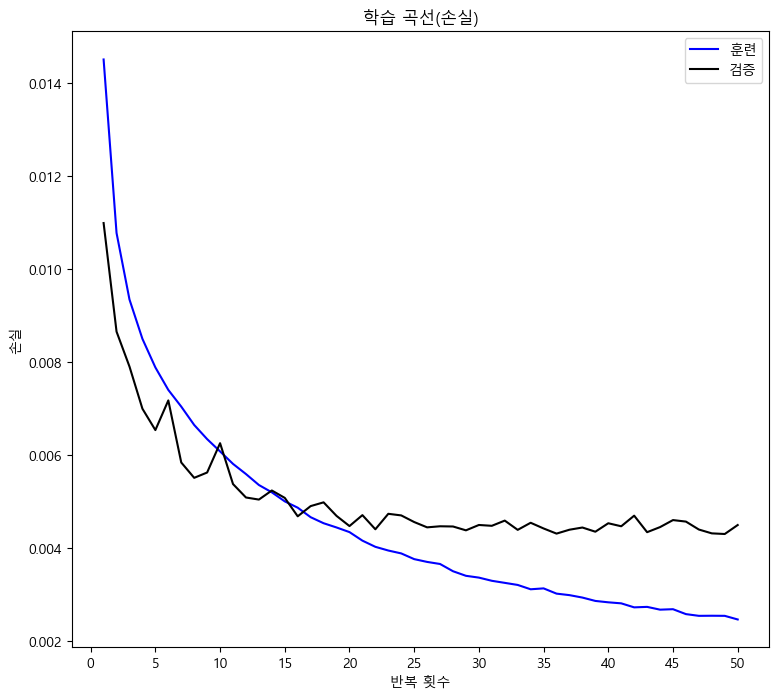

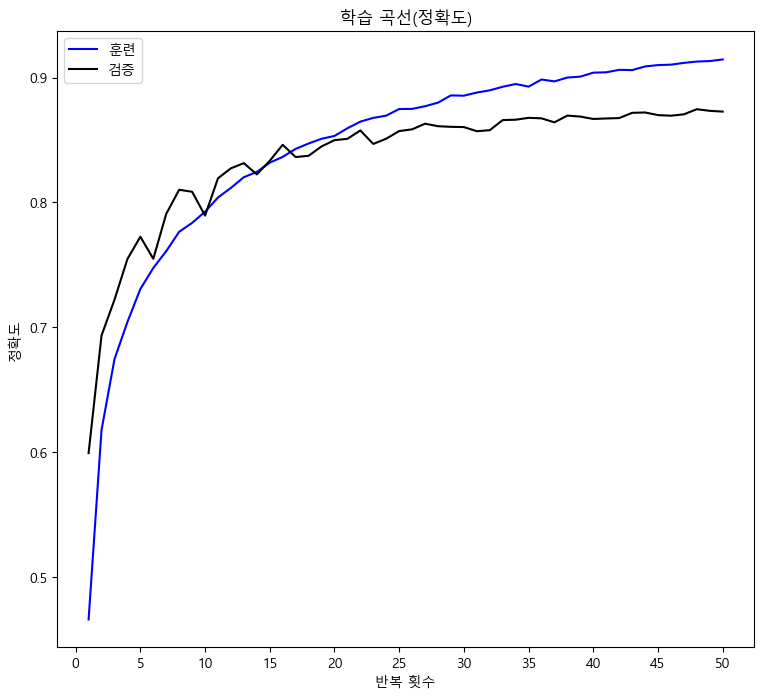

In [66]:
evaluate_history(history)

In [69]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), value=0, inplace=False)
])

In [71]:
train_set2 = datasets.CIFAR10(
    root=data_root, train=True,
    download = True, transform = transform_train
)

batch_size = 100
train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)

Files already downloaded and verified


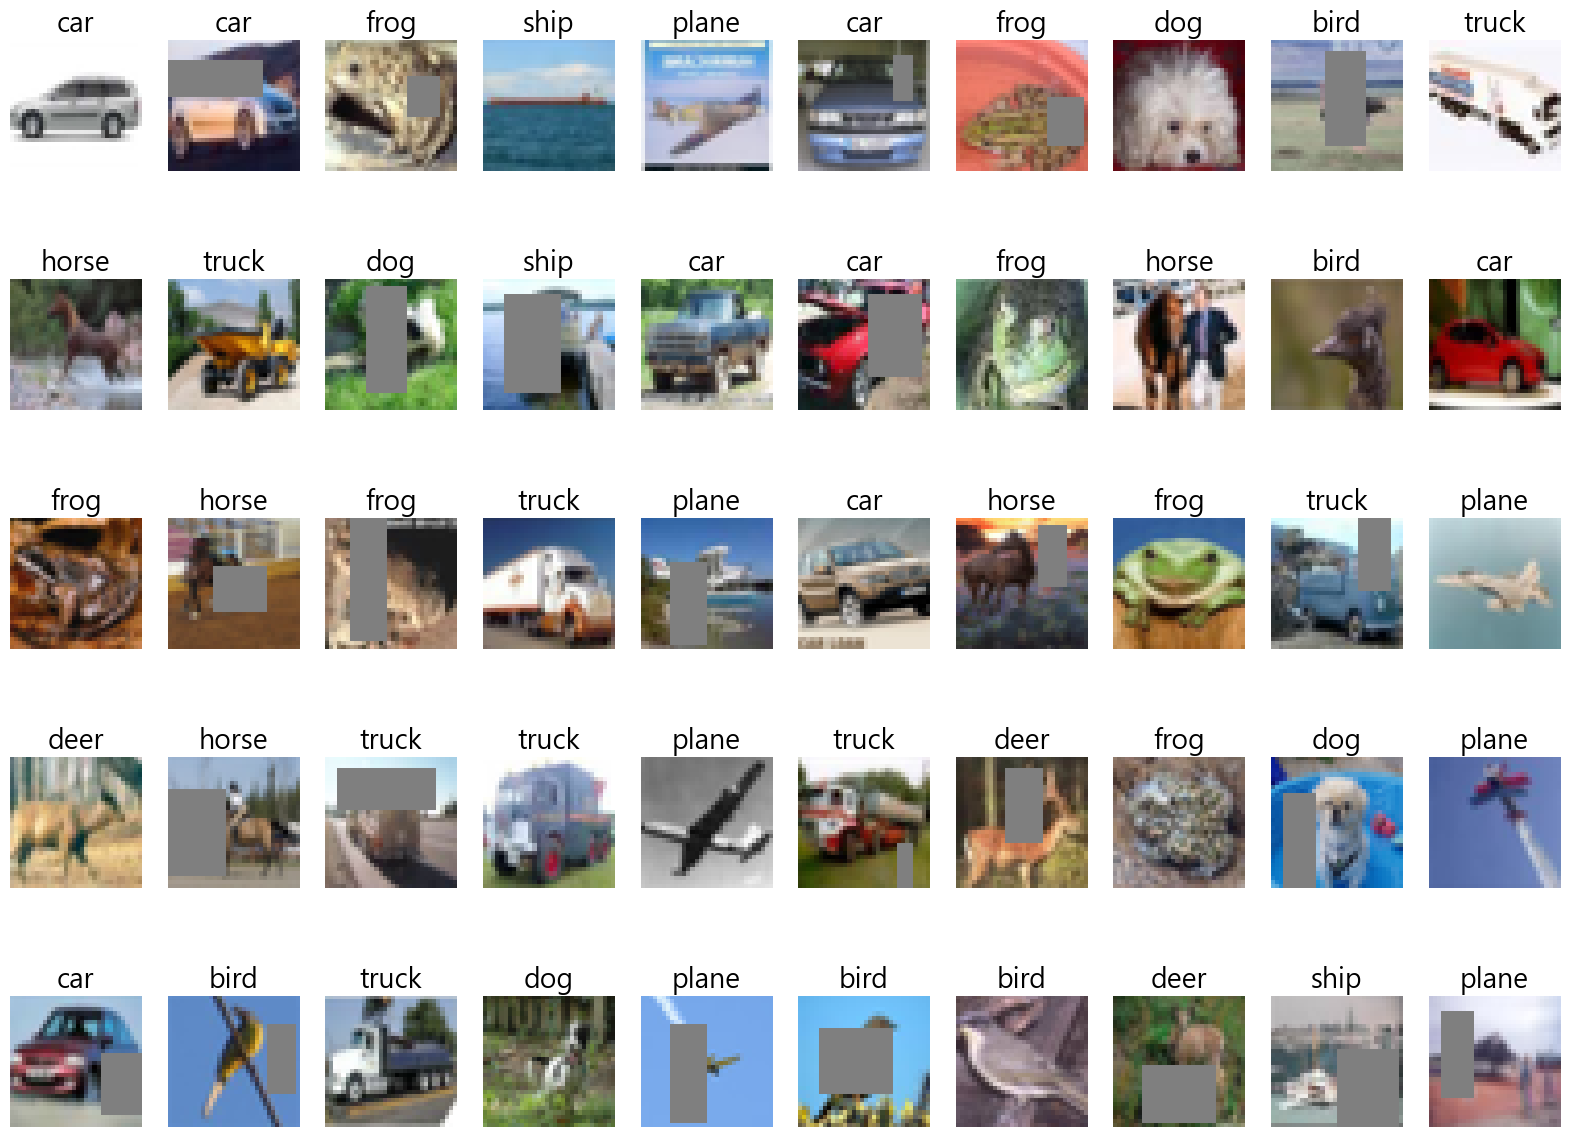

In [72]:
torch_seed=()

show_images_labels(train_loader2, classes, None, None)

In [74]:
num_epochs = 30
history = fit(net, optimizer, criterion, num_epochs, train_loader2, test_loader, device, history)

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [51/80], loss: 0.00584 acc: 0.80330 val_loss: 0.00412, val_acc: 0.87070


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [52/80], loss: 0.00563 acc: 0.81130 val_loss: 0.00410, val_acc: 0.86850


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [53/80], loss: 0.00551 acc: 0.81408 val_loss: 0.00411, val_acc: 0.86690


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [54/80], loss: 0.00543 acc: 0.81888 val_loss: 0.00392, val_acc: 0.87280


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [55/80], loss: 0.00540 acc: 0.81772 val_loss: 0.00418, val_acc: 0.86330


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [56/80], loss: 0.00531 acc: 0.82218 val_loss: 0.00400, val_acc: 0.87280


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [57/80], loss: 0.00527 acc: 0.82334 val_loss: 0.00405, val_acc: 0.86990


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [58/80], loss: 0.00518 acc: 0.82610 val_loss: 0.00406, val_acc: 0.86630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [59/80], loss: 0.00513 acc: 0.82664 val_loss: 0.00402, val_acc: 0.87170


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [60/80], loss: 0.00504 acc: 0.82908 val_loss: 0.00404, val_acc: 0.86930


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [61/80], loss: 0.00502 acc: 0.83104 val_loss: 0.00392, val_acc: 0.87630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [62/80], loss: 0.00504 acc: 0.83088 val_loss: 0.00378, val_acc: 0.87670


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [63/80], loss: 0.00493 acc: 0.83348 val_loss: 0.00405, val_acc: 0.86830


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [64/80], loss: 0.00491 acc: 0.83186 val_loss: 0.00377, val_acc: 0.87630


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [65/80], loss: 0.00489 acc: 0.83552 val_loss: 0.00402, val_acc: 0.87240


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [66/80], loss: 0.00484 acc: 0.83742 val_loss: 0.00386, val_acc: 0.87570


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [67/80], loss: 0.00484 acc: 0.83526 val_loss: 0.00383, val_acc: 0.87550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [68/80], loss: 0.00479 acc: 0.83758 val_loss: 0.00398, val_acc: 0.87110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [69/80], loss: 0.00476 acc: 0.84062 val_loss: 0.00373, val_acc: 0.88030


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [70/80], loss: 0.00478 acc: 0.83884 val_loss: 0.00380, val_acc: 0.87860


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [71/80], loss: 0.00465 acc: 0.83950 val_loss: 0.00398, val_acc: 0.87480


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [72/80], loss: 0.00468 acc: 0.83996 val_loss: 0.00373, val_acc: 0.88110


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [73/80], loss: 0.00462 acc: 0.84254 val_loss: 0.00379, val_acc: 0.87970


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [74/80], loss: 0.00461 acc: 0.84372 val_loss: 0.00383, val_acc: 0.87530


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [75/80], loss: 0.00457 acc: 0.84400 val_loss: 0.00366, val_acc: 0.88120


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [76/80], loss: 0.00453 acc: 0.84706 val_loss: 0.00384, val_acc: 0.87800


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [77/80], loss: 0.00453 acc: 0.84388 val_loss: 0.00378, val_acc: 0.88160


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [78/80], loss: 0.00459 acc: 0.84264 val_loss: 0.00374, val_acc: 0.87980


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [79/80], loss: 0.00446 acc: 0.84918 val_loss: 0.00356, val_acc: 0.88520


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [80/80], loss: 0.00446 acc: 0.84990 val_loss: 0.00393, val_acc: 0.87670


초기상태 : 손실 : 0.01099  정확도 : 0.59920
최종상태 : 손실 : 0.00393 정확도 : 0.87670


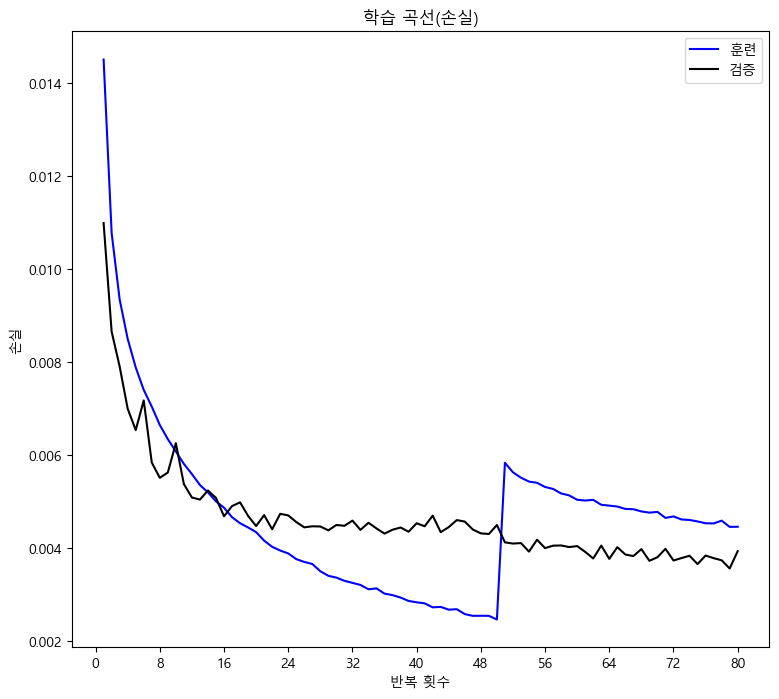

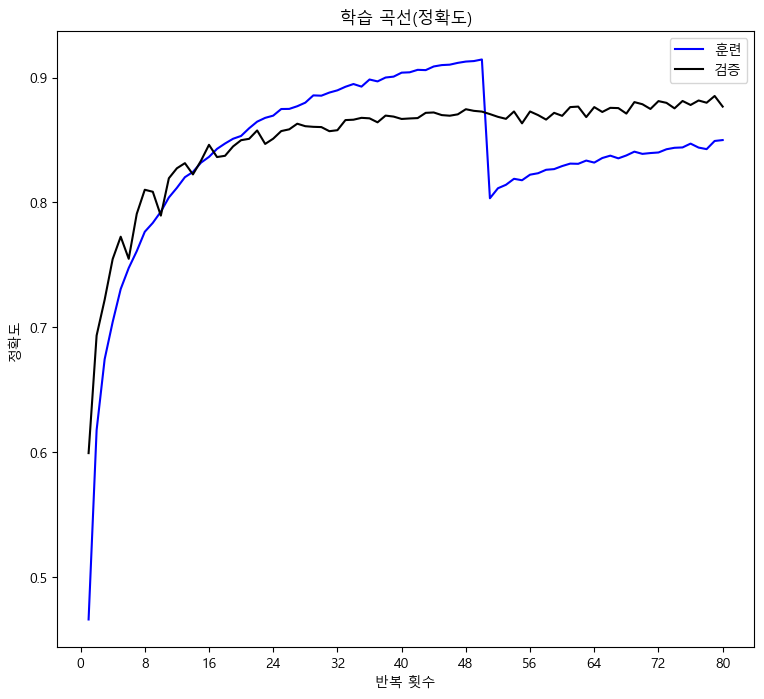

In [75]:
evaluate_history(history)

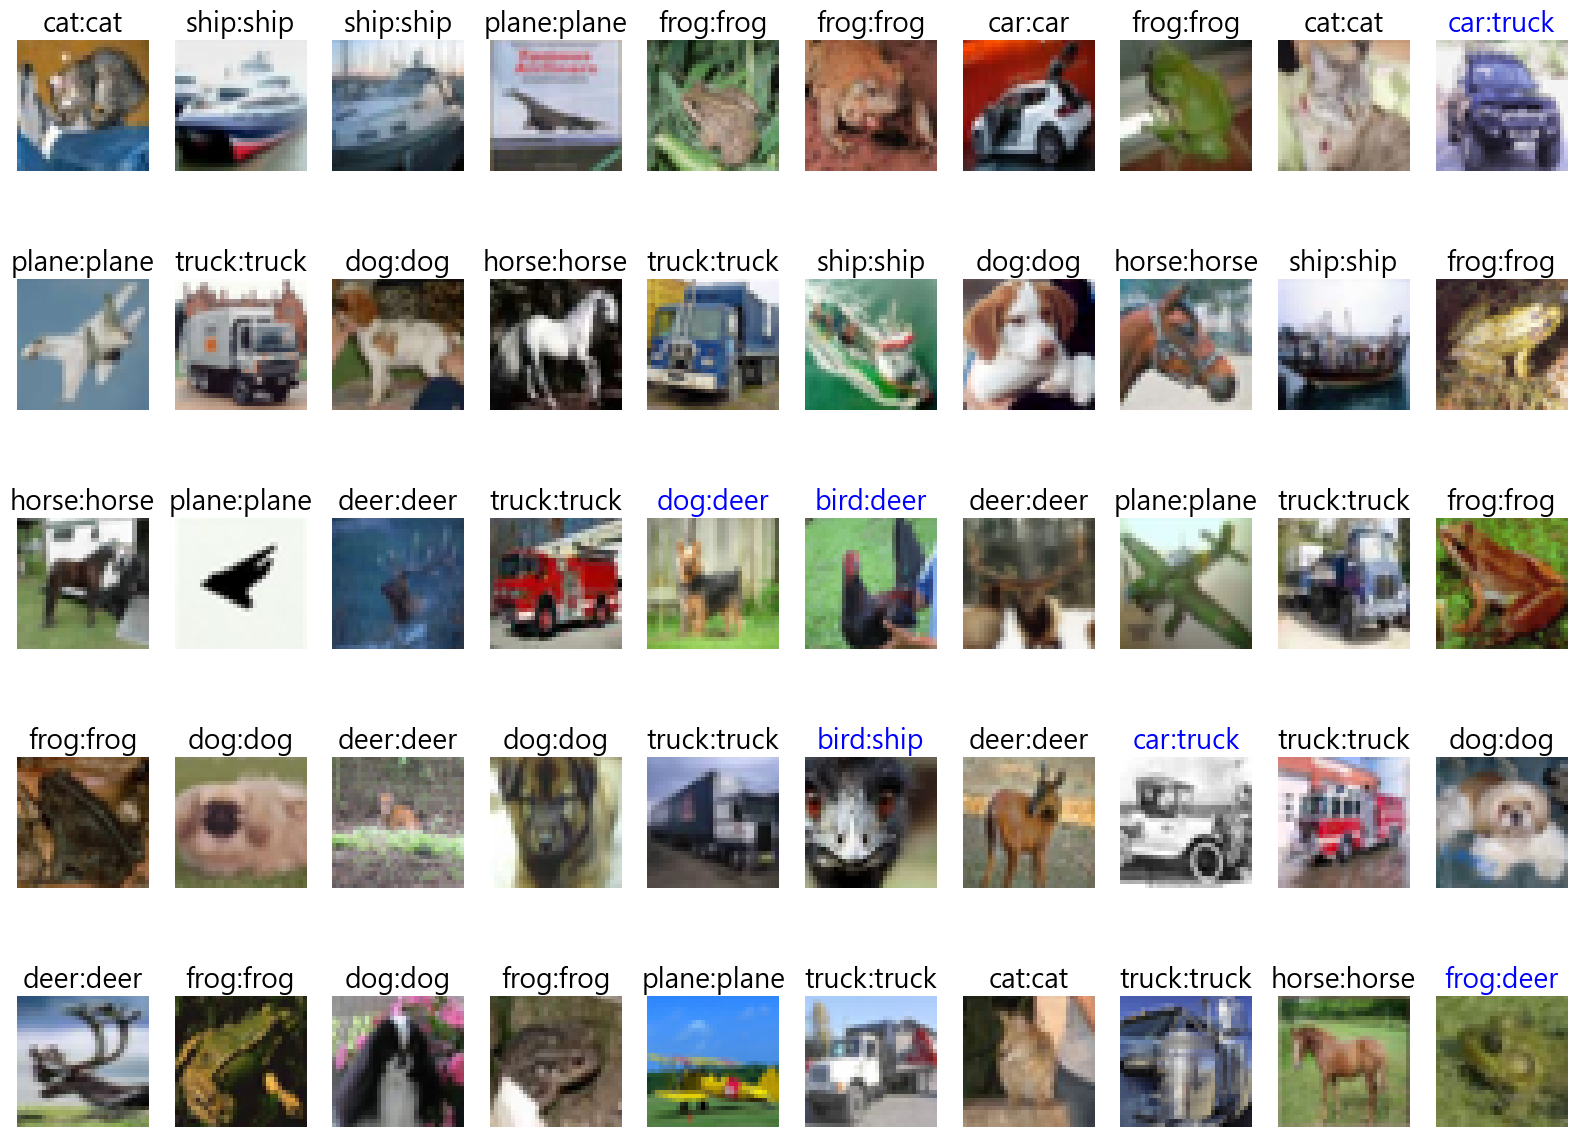

In [76]:
show_images_labels(test_loader, classes, net, device)

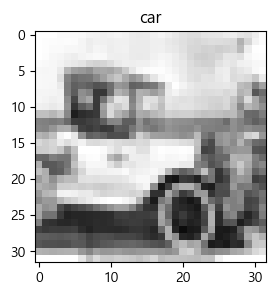

In [80]:
for images, labels in test_loader:
    break
image = images[37]
label = labels[37]

plt.figure(figsize=(3,3))
w = image.numpy().copy()
w2 = np.transpose(w, ((1,2,0)))
w3 = (w2+1)/2
plt.title(classes[label])
plt.imshow(w3)
plt.show()

In [81]:
# 예측 값 출력
image = image.view(1, 3, 32, 32)
image = image.to(device)
output = net(image)

# 라벨 별 확률 값 출력
probs = torch.softmax(output, dim=1)
probs_np = probs.data.to('cpu').numpy()[0]
values = np.frompyfunc(lambda x: f'{x:.04f}', 1, 1)(probs_np)
names = np.array(classes)
tbl = np.array([names, values]).T
print(tbl)

[['plane' '0.0000']
 ['car' '0.0258']
 ['bird' '0.0000']
 ['cat' '0.0000']
 ['deer' '0.0000']
 ['dog' '0.0000']
 ['frog' '0.0000']
 ['horse' '0.0000']
 ['ship' '0.0000']
 ['truck' '0.9742']]
